## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

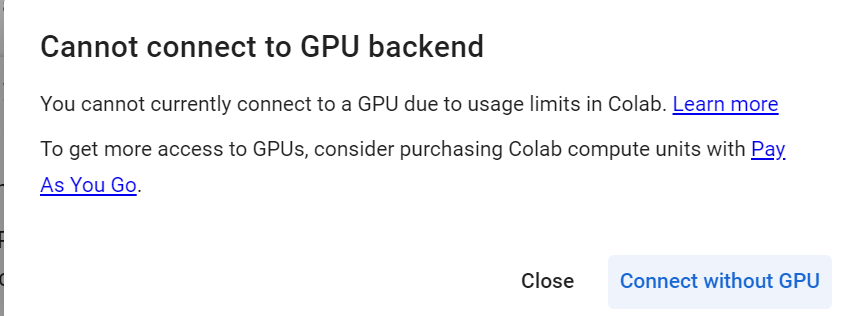

## **Installing and Importing Necessary Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics





In [2]:
!pip install nltk


In [3]:
!pip install spacy

In [4]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string



# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
# nltk.download('punkt')    # loading the punkt module used in tokenization
# nltk.download('omw-1.4')    # dependency for tokenization
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to visualize text data using wordcloud
# from wordcloud import STOPWORDS

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to perform tokenization
# from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
import spacy
nlp = spacy.load('en_core_web_sm')    # loading the envrionment config

# Used in tokenization
from spacy.lang.en import English

# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 101.3 MB/s eta 0:00:00


In [8]:
# installing the libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 8.6 MB/s eta 0:00:00


In [9]:
# installing libraries to remove accented characters and use word embeddings
!pip install unidecode gensim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 10.4 MB/s eta 0:00:00


In [10]:
!pip install zeugma

  Preparing metadata (setup.py) ... done
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8789 sha256=471d760c5e77619840736dd0fbc5ed65cacaeec6118c9372cb97a1ebc42bb5d3
  Stored in directory: /root/.cache/pip/wheels/33/55/16/3d9155ec34c3a4b3c5488ea8905fd994a6cafd68b8e3e26489
Successfully built zeugma


In [11]:
!pip install wheel
!pip install setuptools

In [12]:
!pip install pybind11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 9.7 MB/s eta 0:00:00


## **Loading the dataset**

In [13]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/My Drive/Project 7: Stock Market News Sentiment

Mounted at /gdrive
/gdrive/My Drive/Project 7: Stock Market News Sentiment


In [14]:
data = pd.read_csv("stock_news.csv")

## **Data Overview**

Checking the first five rows of the data

In [15]:
data.head(15)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.74000,42.24500,41.48250,40.24691,130672400,-1
5,2019-01-02,Apple CEO Tim Cook discussed the company's Q1 ...,41.74000,42.24500,41.48250,40.24691,130672400,0
6,2019-01-02,Roku Inc has announced plans to offer premium...,41.74000,42.24500,41.48250,40.24691,130672400,1
7,2019-01-02,Wall Street saw modest gains on Wednesday but...,41.74000,42.24500,41.48250,40.24691,130672400,-1
8,2019-01-02,Apple's fiscal first quarter revenue came in ...,41.74000,42.24500,41.48250,40.24691,130672400,-1
9,2019-01-02,Apple Inc. lowered its quarterly sales foreca...,41.74000,42.24500,41.48250,40.24691,130672400,-1


Checking the shape of the dataset

In [16]:
data.shape

(349, 8)

Checking for Missing Values

In [16]:
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


**Observation**
There are no missing values

Checking for duplicate values

In [19]:
data.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


In [20]:
# checking for duplicate values
data.duplicated().sum()

0

**Observation**
There are no duplicates in the dataset

In [21]:
data.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


## **Exploratory Data Analysis**

**EDA Functions**

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [26]:
def count_words(text):
    return len(text.split())



In [27]:
# Create a new column 'wordcount' by applying the count_words function to the 'news' column
data['wordcount'] = data['News'].apply(count_words)

In [28]:
def count_characters(text):
    return len(text)

In [29]:
data['charcount'] = data['News'].apply(count_characters)



In [30]:
# Calculate the difference between the two columns
data['difference'] = data['Open'] - data['Close']

# Function to flag the difference as 'gain', 'loss', or 'none'
def flag_difference(diff):
    if diff > 0:
        return 'gain'
    elif diff < 0:
        return 'loss'
    else:
        return 'same'

# Credayate a new column 'flag' by applying the flag_difference function to the 'difference' column
data['daystatus'] = data['difference'].apply(flag_difference)

### Univariate Analysis

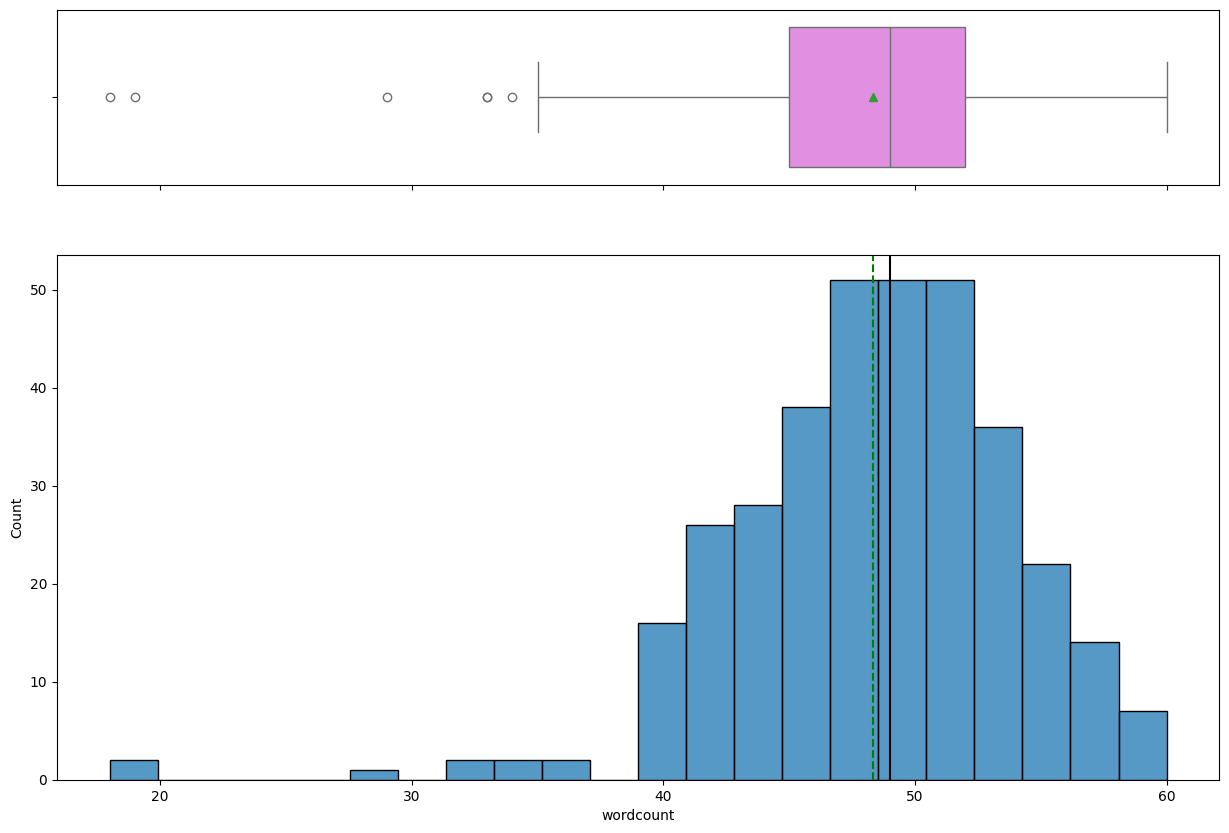

In [31]:
histogram_boxplot(data, "wordcount")

**Observation**
There are some outliers in the word count.

**Checking the distribution of sentiments**

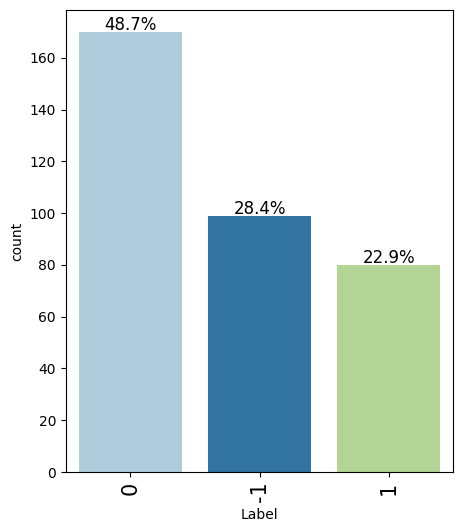

In [32]:
labeled_barplot(data, "Label", perc=True)

**Observation**
There are almost 49% of the news articles have neutral sentiments

### Bivariate Analysis

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.00000,46.22923,6.44282,37.56750,41.74000,45.97500,50.70750,66.81750
High,349.00000,46.70046,6.50732,37.81750,42.24500,46.02500,50.85000,67.06250
Low,349.00000,45.74539,6.39198,37.30500,41.48250,45.64000,49.77750,65.86250
Close,349.00000,44.92632,6.39834,36.25413,40.24691,44.59692,49.11079,64.80523
Volume,349.00000,128948236.10315,43170314.91896,45448000.00000,103272000.00000,115627200.00000,151125200.00000,244439200.00000
Label,349.00000,-0.05444,0.71512,-1.00000,-1.00000,0.00000,0.00000,1.00000
wordcount,349.00000,48.34957,5.71732,18.00000,45.00000,49.00000,52.00000,60.00000
charcount,349.00000,311.23782,39.07947,110.00000,290.00000,315.00000,336.00000,394.00000
difference,349.00000,1.30292,0.55612,-0.18636,0.88532,1.33474,1.67276,2.68779


**Observation**
Average number of words in news articles are 48

daystatus  gain  loss  All
Label                     
All         343     6  349
0           167     3  170
-1           97     2   99
1            79     1   80
------------------------------------------------------------------------------------------------------------------------


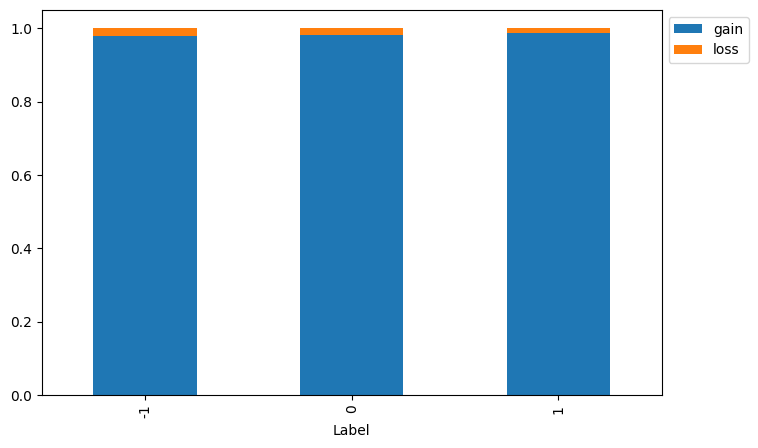

In [34]:
stacked_barplot(data, "Label", "daystatus")

**Observations**
Neither Negative nor Positive news seems to affect the stock price negatively on day to day basis

In [35]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month, and year from the 'Date' column
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.strftime('%B')  # Full month name
data['year'] = data['Date'].dt.year

In [36]:
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label,wordcount,charcount,difference,daystatus,day,month,year
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1,45,324,1.49309,gain,2,January,2019
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,323,1.49309,gain,2,January,2019
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1,48,296,1.49309,gain,2,January,2019
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,300,1.49309,gain,2,January,2019
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.74000,42.24500,41.48250,40.24691,130672400,-1,49,305,1.49309,gain,2,January,2019


daystatus  gain  loss  All
month                     
January     160     6  166
All         343     6  349
April        63     0   63
February     53     0   53
March        67     0   67
------------------------------------------------------------------------------------------------------------------------


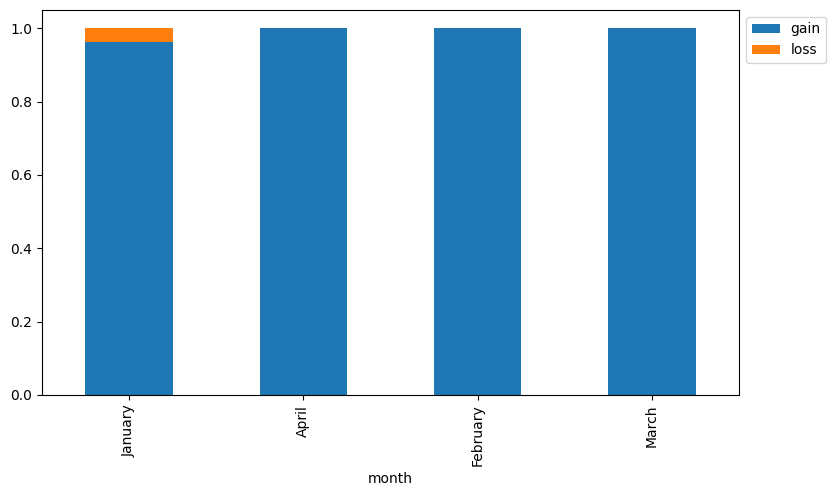

In [37]:
stacked_barplot(data, "month", "daystatus")

**Observation**
In this dataset, we have seen loss only in the month of January comparing Open and Close. There have been only 6 instances.

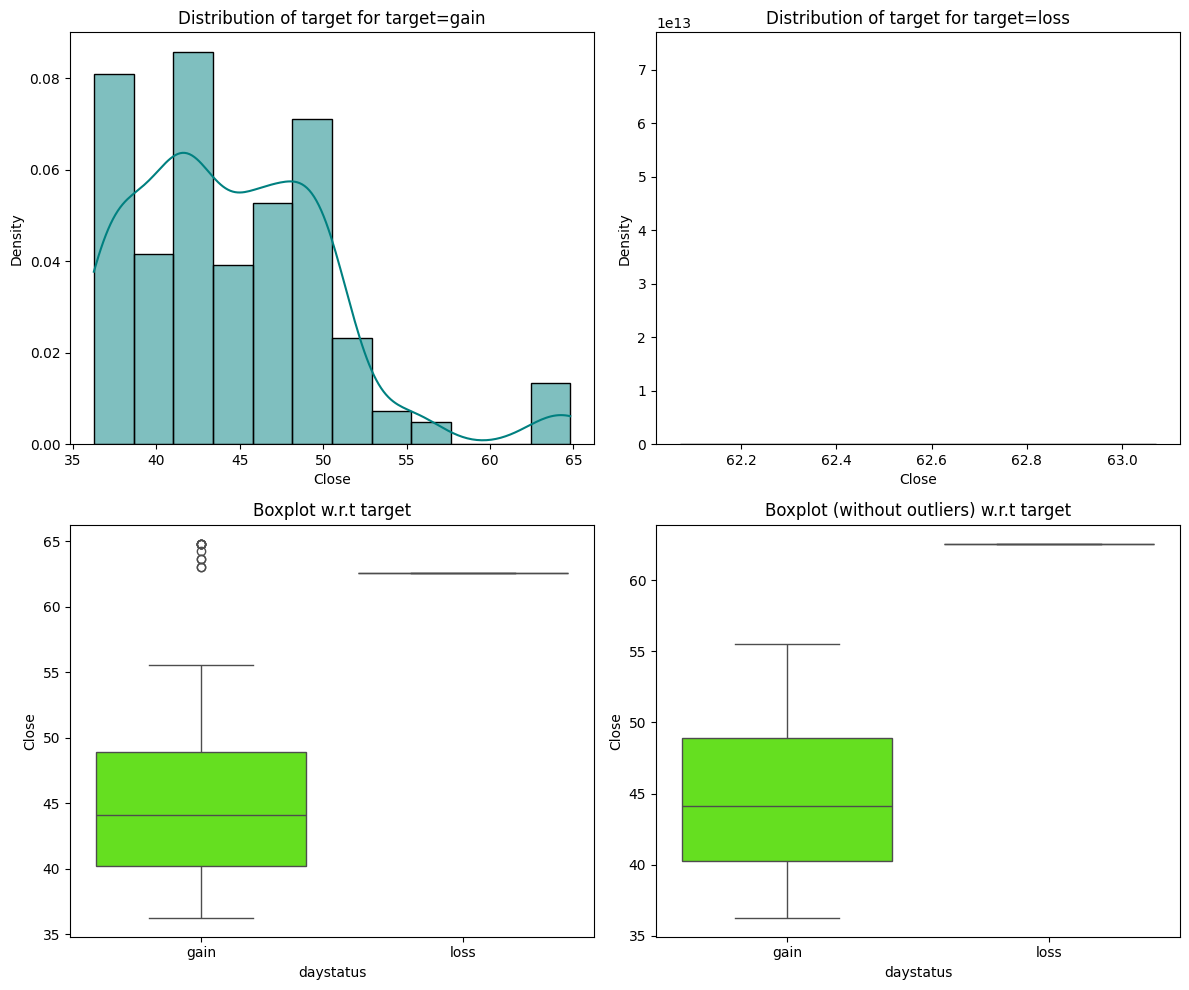

In [38]:
distribution_plot_wrt_target(data, "Close", 'daystatus')

In [39]:
data.head(4)

,Date,News,Open,High,Low,Close,Volume,Label,wordcount,charcount,difference,daystatus,day,month,year
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1,45,324,1.49309,gain,2,January,2019
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,323,1.49309,gain,2,January,2019
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1,48,296,1.49309,gain,2,January,2019
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,300,1.49309,gain,2,January,2019


In [40]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Label']].corr()

# Display the correlation matrix
print(correlation_matrix)

           Open     High      Low    Close   Volume    Label
Open    1.00000  0.99853  0.99790  0.99627 -0.06653  0.06604
High    0.99853  1.00000  0.99733  0.99750 -0.04553  0.06550
Low     0.99790  0.99733  1.00000  0.99845 -0.10352  0.06213
Close   0.99627  0.99750  0.99845  1.00000 -0.07999  0.06014
Volume -0.06653 -0.04553 -0.10352 -0.07999  1.00000 -0.01257
Label   0.06604  0.06550  0.06213  0.06014 -0.01257  1.00000


**Observation**
Due to the type of data we have there is not much we can observe here.

## **Data Preprocessing**

### **Removing special characters**

In [41]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [42]:
# Applying the function to remove special characters
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [43]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


### **Lowercasing**

In [44]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [45]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


### **Removing extra whitespace**

In [46]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [47]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...
3,This news article reports that yields on long...,this news article reports that yields on long ...


### **Removing stopwords**

In [48]:
import nltk
nltk.download('stopwords')  # This downloads the stopwords data
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
    return new_text

In [50]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [51]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,this news article reports that yields on long ...,news article reports yields long dated u treas...


### **Stemming**

In [52]:
from nltk.stem import PorterStemmer


In [53]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [54]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [55]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [56]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...


## **Sentiment Analysis**

In [73]:

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch
from transformers import BertTokenizer, BertModel


In [80]:
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer

In [81]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['final_cleaned_text'], data['Label'], test_size=0.2, random_state=42)

In [82]:
# Function to create Word2Vec embeddings
def create_word2vec_embeddings(texts):
    model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)
    return model

In [83]:
# Function to create GloVe embeddings
def create_glove_embeddings(texts, glove_file):
    glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False)
    return glove_model

In [84]:
# Function to create Sentence Transformer embeddings
def create_sentence_transformer_embeddings(texts):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(texts)
    return embeddings

In [85]:
# Create embeddings
word2vec_model = create_word2vec_embeddings(X_train)

In [86]:

# Create embeddings

from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)



In [87]:
X_train = X_train.reset_index(drop=True)

In [88]:
X_test = X_test.reset_index(drop=True)

In [89]:
sentence_transformer_embeddings = create_sentence_transformer_embeddings(X_train)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [90]:
# Function to get average word vectors
def get_average_word_vectors(texts, model):
    vectors = []
    for text in texts:
        words = text.split()
        word_vectors = [model[word] for word in words if word in model]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

In [91]:
# Get embeddings for train and test sets
X_train_word2vec = get_average_word_vectors(X_train, word2vec_model.wv)
X_test_word2vec = get_average_word_vectors(X_test, word2vec_model.wv)

X_train_glove = get_average_word_vectors(X_train, glove_model)
X_test_glove = get_average_word_vectors(X_test, glove_model)

X_train_sentence_transformer = sentence_transformer_embeddings
X_test_sentence_transformer = create_sentence_transformer_embeddings(X_test)

In [92]:
# Function to build and evaluate model
def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Specify 'weighted' average for multiclass classification
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return best_model, accuracy, f1, precision, recall

In [93]:
# Evaluate models
word2vec_model, word2vec_accuracy, word2vec_f1, word2vec_precision, word2vec_recall = build_and_evaluate_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
glove_model, glove_accuracy, glove_f1, glove_precision, glove_recall = build_and_evaluate_model(X_train_glove, X_test_glove, y_train, y_test)
sentence_transformer_model, sentence_transformer_accuracy, sentence_transformer_f1, sentence_transformer_precision, sentence_transformer_recall = build_and_evaluate_model(X_train_sentence_transformer, X_test_sentence_transformer, y_train, y_test)


In [94]:

# Compare model performance
print("Word2Vec Model Performance:")
print(f"Accuracy: {word2vec_accuracy}, F1 Score: {word2vec_f1}, Precision: {word2vec_precision}, Recall: {word2vec_recall}")

Word2Vec Model Performance:
Accuracy: 0.4142857142857143, F1 Score: 0.3244588744588745, Precision: 0.3496240601503759, Recall: 0.4142857142857143


**Observation**

* **Accuracy (0.414)**: This indicates that the model correctly classified approximately 41.4% of the instances. While accuracy is a straightforward measure, it can be misleading if the dataset is imbalanced.
* **F1 Score (0.324)**: The F1 score is the harmonic mean of precision and recall. It provides a balance between the two, giving us a single metric that considers both false positives and false negatives. An F1 score of 0.324 suggests that the model’s performance is relatively low, indicating room for improvement.
* **Precision (0.350)**: Precision measures the proportion of true positive predictions among all positive predictions. A precision of 0.350 means that 35% of the instances predicted as positive are actually positive. This metric is crucial when the cost of false positives is high.
Recall (0.414): Recall measures the proportion of true positive predictions among all actual positive instances. A recall of 0.414 means that the model correctly identified 41.4% of the actual positive instances. This metric is important when the cost of false negatives is high.

* Overall, these metrics suggest that the Word2Vec model has moderate recall but relatively low precision and F1 score, indicating that it may be struggling with false positives and false negatives. Improving the model’s performance might involve tuning hyperparameters, using more training data, or exploring different model architectures.

In [96]:
print("GloVe Model Performance:")
print(f"Accuracy: {glove_accuracy}, F1 Score: {glove_f1}, Precision: {glove_precision}, Recall: {glove_recall}")

GloVe Model Performance:
Accuracy: 0.44285714285714284, F1 Score: 0.35351473922902493, Precision: 0.3065363881401617, Recall: 0.44285714285714284


**Observation**
It looks like the GloVe model’s performance metrics are not very high. Here are the key metrics you provided:

* Accuracy: 0.44
* F1 Score: 0.35
* Precision: 0.31
* Recall: 0.44

In [97]:
print("Sentence Transformer Model Performance:")
print(f"Accuracy: {sentence_transformer_accuracy}, F1 Score: {sentence_transformer_f1}, Precision: {sentence_transformer_precision}, Recall: {sentence_transformer_recall}")

Sentence Transformer Model Performance:
Accuracy: 0.44285714285714284, F1 Score: 0.3377435998554011, Precision: 0.4206256273001004, Recall: 0.44285714285714284


**Observation**

* Accuracy: 0.4429 - This means the model correctly predicted about 44.29% of the instances.
* F1 Score: 0.3377 - This is the harmonic mean of precision and recall, indicating a balance between the two.
* Precision: 0.4206 - This shows that 42.06% of the model’s positive predictions were correct.
* Recall: 0.4429 - This indicates that the model correctly identified 44.29% of all actual positive instances.

In [98]:
# Choose the best model based on performance
best_model = max([(word2vec_model, word2vec_accuracy), (glove_model, glove_accuracy), (sentence_transformer_model, sentence_transformer_accuracy)], key=lambda x: x[1])[0]

In [99]:
print(best_model)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)


**Observation**
Based on code we have written best model is RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [100]:
# Check performance on test set
# Assuming 'best_model' was trained with data that has 100 features,
# you should use the corresponding test set with the same number of features.

# If 'best_model' is the Word2Vec model:
if best_model == word2vec_model:
    y_test_pred = best_model.predict(X_test_word2vec)
# If 'best_model' is the GloVe model:
elif best_model == glove_model:
    y_test_pred = best_model.predict(X_test_glove)
# If 'best_model' is the Sentence Transformer model:
elif best_model == sentence_transformer_model:
    y_test_pred = best_model.predict(X_test_sentence_transformer)
else:
    raise ValueError("Unknown best_model") #Handle cases where best_model is not recognized.

test_accuracy = accuracy_score(y_test, y_test_pred)
# Specify the 'average' parameter for multiclass classification
test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # or 'micro', 'macro'
test_precision = precision_score(y_test, y_test_pred, average='weighted') # or 'micro', 'macro'
test_recall = recall_score(y_test, y_test_pred, average='weighted') # or 'micro', 'macro'

print("Final Model Performance on Test Set:")
print(f"Accuracy: {test_accuracy}, F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")

Final Model Performance on Test Set:
Accuracy: 0.44285714285714284, F1 Score: 0.35351473922902493, Precision: 0.3065363881401617, Recall: 0.44285714285714284


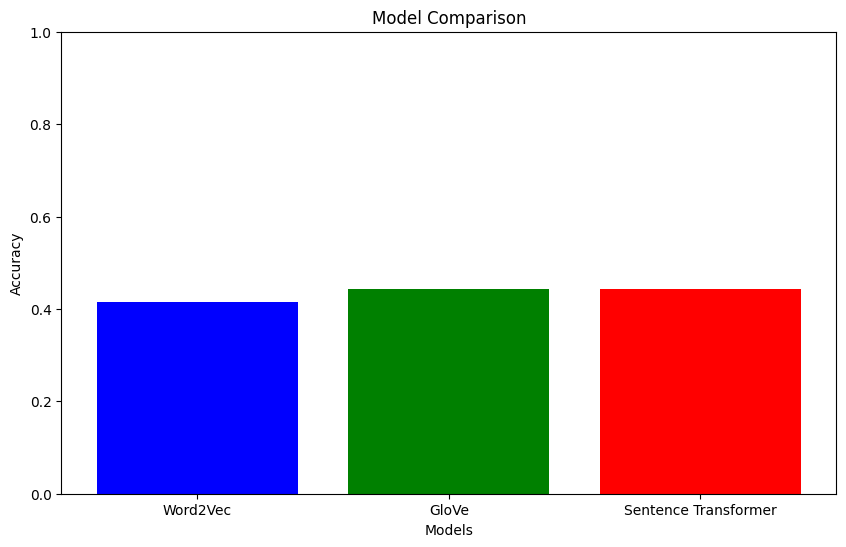

In [101]:

# Plot the results
models = ['Word2Vec', 'GloVe', 'Sentence Transformer']
accuracies = [word2vec_accuracy, glove_accuracy, sentence_transformer_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()


**Observation**

Here is the bar graph which show the accuracy scores.

## **Weekly News Summarization**

## **Conclusions and Recommendations**

We analyzed the provided data, based on data, on daily basis stock price is not affected either by positive or negative sentiments. Long Term affects to the stock price analysis is still desired.

We performed sentiment analysis with the following models.word2vec_model,glove_model, sentence_transformer_model. Based on this analysis best model has turned out to be *RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,random_state=42)*

More model tuning is necessary to improve the overall scores.

Weekly News Negative, Positive and Neutral news were identified using LLAMA. Extracted the results in a json format and displayed.

Analyzing the negative news and positive news with large amount of data will provide valuable insights on how the stock perform. Resources must be allocated to perform analyzes on regular basis to understand its trend.

More suitable Models can be choosen which analyzes the stock market and related news articles instead of a very generalized model like LLAMA.



-




<font size=6 color='blue'>Power Ahead</font>
___